In [1]:
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')
nltk.download('universal_tagset')
nltk.download('indian')
nltk.download('sinica_treebank')
nltk.download('mac_morpho')
nltk.download('conll2002')
nltk.download('cess_cat')
from nltk.corpus import brown, treebank, conll2000, indian, sinica_treebank, mac_morpho, conll2002, cess_cat
from torch.utils.data import Dataset, DataLoader

def get_lang_data():
  treebank_corpus = treebank.tagged_sents(tagset='universal')
  brown_corpus = brown.tagged_sents(tagset='universal', categories = 'news')
  conll_corpus = conll2000.tagged_sents(tagset='universal')
  indian_corpus = indian.tagged_sents()
  sinica_treebank_corpus = sinica_treebank.tagged_sents()
  conll_2002_corpus = conll2002.tagged_sents()
  mac_morpho_corpus = mac_morpho.tagged_sents()
  cess_cat_corpus = cess_cat.tagged_sents()
  tagged_sentences = treebank_corpus + brown_corpus + conll_corpus + indian_corpus + sinica_treebank_corpus + mac_morpho_corpus + cess_cat_corpus
  sentences = []
  tags = []

  for tagged_sentence in tagged_sentences:
    sentence, tag_list = zip(*tagged_sentence)
    sentences.append(list(sentence))
    tags.append(list(tag_list))
  
  return sentences, tags

sentences, tags = get_lang_data()

[nltk_data] Downloading package treebank to /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package brown to /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package conll2000 to /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/aj3281/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package indian to /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package sinica_treebank to
[nltk_data]     /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/sinica_treebank.zip.
[nltk_data] Downloading package mac_morpho to
[nltk_data]     /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package conll2002 to /home/aj3281/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.z

In [2]:
sentences[0]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [3]:
tags[0]

['NOUN',
 'NOUN',
 '.',
 'NUM',
 'NOUN',
 'ADJ',
 '.',
 'VERB',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'NOUN',
 'NUM',
 '.']

In [4]:
from sklearn.model_selection import train_test_split
train_sentences, valid_sentences, train_taggings, valid_taggings = train_test_split(sentences, tags, test_size = 0.25, random_state = 42)

In [5]:
# import urllib.request

# for filename in ['en_ewt-ud-train.conllu', 'en_ewt-ud-dev.conllu', 'en_ewt-ud-test.conllu']:
#   urllib.request.urlretrieve('https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/' + filename, filename)

# with open('en_ewt-ud-train.conllu') as fp:
#   for line in fp.readlines()[:10]:
#     print(line, end='')

In [6]:
# !pip -q install conllu

# import conllu

# def load_conllu(filename):
#   with open(filename) as fp:
#     data = conllu.parse(fp.read())
#   sentences = [[token['form'] for token in sentence] for sentence in data]
#   taggings = [[token['xpos'] for token in sentence] for sentence in data]
#   return sentences, taggings

# train_sentences, train_taggings = load_conllu('en_ewt-ud-train.conllu')
# valid_sentences, valid_taggings = load_conllu('en_ewt-ud-dev.conllu')
# test_sentences, test_taggings = load_conllu('en_ewt-ud-test.conllu')

# print(train_sentences[0])
# #print(list(zip(train_sentences[42], train_taggings[42])))

In [7]:
print(list(zip(train_sentences[182], train_taggings[182])))

[('It', 'PRON'), ('*EXP*-1', 'X'), ("'s", 'VERB'), ('interesting', 'ADJ'), ('*', 'X'), ('to', 'PRT'), ('find', 'VERB'), ('that', 'ADP'), ('a', 'DET'), ('lot', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('expensive', 'ADJ'), ('wines', 'NOUN'), ('are', 'VERB'), ("n't", 'ADV'), ('always', 'ADV'), ('walking', 'VERB'), ('out', 'ADP'), ('the', 'DET'), ('door', 'NOUN'), ('.', '.')]


In [8]:
# use a defaultdict to count the number of occurrences of each tag
import collections
tagset = collections.defaultdict(int)

for tagging in train_taggings:
  for tag in tagging:
    tagset[tag] += 1

print('number of different tags:', len(tagset))

# print count and tag sorted by decreasing count
for tag, count in sorted(tagset.items(), reverse=True, key=lambda x: x[1]):
  print(count, tag)

number of different tags: 654
176467 N
113334 ART
104186 NOUN
84963 NPROP
79323 PREP
73126 V
62983 ADJ
58519 PREP|+
51191 ,
48931 VERB
48549 sps00
41634 .
37745 ADP
34623 ADV
33121 DET
25241 NUM
23410 ncfs000
22264 ncms000
21077 KC
20651 Fc
17303 PCP
15788 "
15639 PROADJ
14823 VAUX
13173 np00000
13116 da0fs0
12762 Fp
11909 vmn0000
11264 ncmp000
11019 cc
10947 PROPESS
10730 KS
10631 PRT
10147 NN
9811 rg
9719 PRON
9126 da0ms0
8632 CONJ
8413 PRO-KS-REL
8269 ncfp000
7932 vaip3s0
7549 spcms
7423 da0cs0
7148 Nab
7120 cs
6507 vmip3s0
6376 PROSUB
6177 sn.e-SUJ
5984 pr0cn000
5782 )
5770 (
5309 DE
5103 PDEN
5083 X
5053 aq0cs0
5028 :
4873 vmp00sm
4373 di0ms0
4148 da0fp0
4115 SYM
3708 aq0ms0
3677 da0mp0
3675 np0000o
3347 aq0fs0
3306 Nac
3288 di0fs0
3264 N|AP
3250 Fe
3173 p0000000
3161 Z
3096 Fz
3061 VM
2972 np0000l
2918 Nad
2882 spcmp
2780 VH11
2482 W
2470 VC2
2382 JJ
2375 -
2281 vmip3p0
2255 vaip3p0
2216 np0000p
2208 Caa
2198 aq0cp0
2158 rn
2154 NNP
2145 N|EST
2079 Nhaa
2077 DM
2074 PRP
1951 CUR


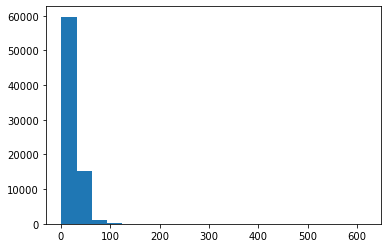

max length: 617


In [9]:
from matplotlib import pyplot as plt

# compute and show histogram for sentence length
plt.hist([len(sentence) for sentence in train_sentences], 20)
plt.show()

# compute max sentence length
print('max length:', max([len(sentence) for sentence in train_sentences]))

In [10]:
# train_sentences

In [11]:
# install transformers package
!pip -q install transformers

# import relevant classes for pretrained tokenizer and model
from transformers import AutoTokenizer, AutoModel

In [12]:
# load tokenizer for a specific bert model (bert-base-cased)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# tokenize an example sentence
tokenizer.tokenize('This tokenizer is sooooo awesome.')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

['This',
 'tok',
 '##eni',
 '##zer',
 'is',
 'soo',
 '##oo',
 '##o',
 'aw',
 '##eso',
 '##me',
 '.']

In [13]:
import re

def align_tokenizations(sentences, taggings):
  bert_tokenized_sentences = []
  aligned_taggings = []
  count = 0
  for sentence, tagging in zip(sentences, taggings):
    # first generate BERT-tokenization
    bert_tokenized_sentence = tokenizer.tokenize(' '.join(sentence))
    # print(bert_tokenized_sentence, sentence)
    aligned_tagging = []
    current_word = ''

    index = 0 # index of current word in sentence and tagging
    for token in bert_tokenized_sentence:
      current_word += re.sub(r'^##', '', token) # recompose word with subtoken
      # print(index, token, len(sentence)) #, sentence)
      try: 
        sentence[index] = sentence[index].replace('\xad', '') # fix bug in data
      except:
        print(sentence)
        break  
        # print(bert_tokenized_sentence)
        

      # note that some word factors correspond to unknown words in BERT
      # print(token, sentence[index].startswith(current_word), sentence[index], current_word)
      # assert token == '[UNK]' or sentence[index].startswith(current_word)

      if token == '[UNK]' or sentence[index] == current_word: # if we completed a word
        current_word = ''
        aligned_tagging.append(tagging[index])
        index += 1
      else: # otherwise insert padding
        aligned_tagging.append('<pad>')

    # assert len(bert_tokenized_sentence) == len(aligned_tagging)

    if(len(aligned_tagging)==len(bert_tokenized_sentence)):
        
      bert_tokenized_sentences.append(bert_tokenized_sentence)
      aligned_taggings.append(aligned_tagging)
    else: 
      print(len(aligned_tagging), len(bert_tokenized_sentence))
      count+=1 

  return bert_tokenized_sentences, aligned_taggings

train_bert_tokenized_sentences, train_aligned_taggings = align_tokenizations(train_sentences, train_taggings)
valid_bert_tokenized_sentences, valid_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)
test_bert_tokenized_sentences, test_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)

# print(train_bert_tokenized_sentences[42])
# print(train_aligned_taggings[42])

['有', '了', '一對', '小', '犄角']
6 7


Token indices sequence length is longer than the specified maximum sequence length for this model (856 > 512). Running this sequence through the model will result in indexing errors


['就', '在', '自己', '的', '小', '房間', '裡', '打瞌睡']
11 12
['起步', '甚', '早', '的', '德國', '在', '這', '方面', '卻', '仍', '步履', '蹣跚']
16 17
['Segundo', 'o', 'dono', 'de', 'o', 'restaurante', ',', 'Fuad', 'Zegaid', ',', '61', ',', 'este', 'é', 'o', 'primeiro', 'caso', 'de', 'assalto', 'em', 'o', 'Dinho`s']
27 28
['這句', '話', '就', '像', '是', '堅強', '的', '胳臂']
10 11
['枝頭', '上', '的', '小鳥', '總是', '吱吱喳喳', '的', '叫']
11 14
['他', '伸開', '胳臂']
4 5
['日亞航', '目前', '所', '使用', '的', '機種', '主要', '為', '波音', '７４７', '及', 'ＤＣ－１０']
21 24
['你', '兒子', '賭氣', '不', '吃', '紅蘿蔔', '時', '可以', '連', '餓', '十九個', '不吭一氣']
20 22
['再', '給', '人', '痛苦', '和', '懊悔']
7 8
['除了', '有', '維護', '國家', '領土', '主權', '完整', '職責', '的', '基督徒', '總統', '李豋輝']
23 24
['鼓聲', '咚咚']
3 4
['外號', '泰山', '的', '黑索汀', '今天', '在', '英國', '保守黨', '黨魁', '選舉', '中', '來勢洶洶']
24 25
['大福', '靠在', '父親', '的', '床', '邊', '打瞌睡']
11 12
['電影', '中', '正面', '人物', '的', '行為', '必定', '不會', '和', '觀眾', '的', '認知', '產生', '牴觸']
23 24
['上個', '星期六', '市場', '上', '一片', '悲觀', '氣氛', '及', '假期', '恐懼症', '瀰漫']
21 22
['

In [14]:
import torch
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

import collections

label_vocab = collections.defaultdict(lambda: len(label_vocab))
label_vocab['<pad>'] = 0

def convert_to_ids(sentences, taggings):
  sentences_ids = []
  taggings_ids = []
  for sentence, tagging in zip(sentences, taggings):
    sentence_tensor = torch.tensor(tokenizer.convert_tokens_to_ids(['[CLS]'] + sentence + ['SEP'])).long()
    tagging_tensor = torch.tensor([0] + [label_vocab[tag] for tag in tagging] + [0]).long()

    sentences_ids.append(sentence_tensor.to(device))
    taggings_ids.append(tagging_tensor.to(device))
  return sentences_ids, taggings_ids

train_sentences_ids, train_taggings_ids = convert_to_ids(train_bert_tokenized_sentences, train_aligned_taggings)
valid_sentences_ids, valid_taggings_ids = convert_to_ids(valid_bert_tokenized_sentences, valid_aligned_taggings)
test_sentences_ids, test_taggings_ids = convert_to_ids(test_bert_tokenized_sentences, test_aligned_taggings)

# print(train_sentences_ids[42])
# print(train_taggings_ids[42])
print('num labels:', len(label_vocab))

num labels: 685


In [15]:
len(train_taggings_ids)

76196

In [16]:
print('num labels:', len(label_vocab))

num labels: 685


In [17]:
from torch.utils.data import Dataset

class PosTaggingDataset(Dataset):
  def __init__(self, sentences, taggings):
    assert len(sentences) == len(taggings)
    self.sentences = sentences
    self.taggings = taggings

  def __getitem__(self, i):
    return self.sentences[i], self.taggings[i]

  def __len__(self):
    return len(self.sentences)

In [18]:
def collate_fn(items):
  max_len = max(len(item[0]) for item in items)

  sentences = torch.zeros((len(items), max_len), device=items[0][0].device).long().to(device)
  taggings = torch.zeros((len(items), max_len)).long().to(device)

  for i, (sentence, tagging) in enumerate(items):
    sentences[i][0:len(sentence)] = sentence
    taggings[i][0:len(tagging)] = tagging

  return sentences, taggings


x, y = collate_fn([[torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])], [torch.tensor([1, 2]), torch.tensor([3, 4])]])
print(x.shape, y.shape)

torch.Size([2, 3]) torch.Size([2, 3])


In [19]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(PosTaggingDataset(train_sentences_ids, train_taggings_ids), batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
valid_loader = DataLoader(PosTaggingDataset(valid_sentences_ids, valid_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(PosTaggingDataset(test_sentences_ids, test_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class RNNClassifier(nn.Module):
  def __init__(self, num_labels, embed_size=128, hidden_size=128):
    super().__init__()
    self.embedding = nn.Embedding(tokenizer.vocab_size, embed_size, padding_idx=tokenizer.pad_token_id)
    self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=True, batch_first=True)
    self.decision = nn.Linear(1 * 2 * hidden_size, num_labels) # size output by GRU is number of layers * number of directions * hidden size
    self.to(device)
  
  def forward(self, sentences):
    embed_rep = self.embedding(sentences)
    word_rep, sentence_rep = self.rnn(embed_rep)
    return self.decision(F.dropout(F.gelu(word_rep), 0.3))

# check that model works on an arbitrary batch that contains two sentences of length 3
rnn_model = RNNClassifier(len(label_vocab))
with torch.no_grad():
  y = rnn_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))

# the expected shape is (batch size, max sentence length, number of labels)
print(y.shape)

torch.Size([2, 3, 685])


In [21]:
def perf(model, loader):
  criterion = nn.CrossEntropyLoss()
  model.eval() # do not apply training-specific steps such as dropout
  total_loss = correct = num_loss = num_perf = 0
  for x, y in loader:
    with torch.no_grad(): # no need to store computation graph for gradients
      # perform inference and compute loss
      if(x.shape[1]>=512 or x.shape[0]!=64):
        continue 
      y_scores = model(x)
      loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1)) # requires tensors of shape (num-instances, num-labels) and (num-instances)

      # gather loss statistics
      total_loss += loss.item()
      num_loss += 1

      # gather accuracy statistics
      y_pred = torch.max(y_scores, 2)[1] # compute highest-scoring tag
      mask = (y != 0) # ignore <pad> tags
      correct += torch.sum((y_pred == y) * mask) # compute number of correct predictions
      num_perf += torch.sum(mask).item()
  return total_loss / num_loss, correct.item() / num_perf

# without training, accuracy should be a bit less than 2% (chance of getting a label correct)
perf(rnn_model, valid_loader)

(6.551472856308603, 0.0004817324851922003)

In [22]:
import torch.optim as optim

def fit(model, epochs):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-2)
  for epoch in range(epochs):
    model.train()
    total_loss = num = 0
    for x, y in train_loader:
      optimizer.zero_grad() # start accumulating gradients
      # print(x.shape)
      if(x.shape[1]>=512 or x.shape[0]!=64):
        # print(x.shape, "here")
        continue 
      else: 
        # print(x.shape, "222222")  
        y_scores = model(x)
        loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1))
        loss.backward() # compute gradients though computation graph
        optimizer.step() # modify model parameters
        total_loss += loss.item()
        num += 1
    print(1 + epoch, total_loss / num, *perf(model, valid_loader))

In [23]:
rnn_model = RNNClassifier(len(label_vocab))
fit(rnn_model, 5)

1 0.20993497718738605 0.1092822381063615 0.8618960552678542
2 0.09186533502605645 0.09118140165972982 0.8858567721733799
3 0.08077287392745792 0.08704039385438268 0.8908310250318418
4 0.07749751727666533 0.08861318703854296 0.8871797117633964
5 0.07819280645609657 0.09248456298397277 0.8877034133666166


In [24]:
class LinearProbeRandom(nn.Module):
  def __init__(self, num_labels):
    super().__init__()
    self.embedding = nn.Embedding(tokenizer.vocab_size, 768)
    self.probe = nn.Linear(768, num_labels)
    self.to(device)

  def parameters(self):
    return self.probe.parameters()
  
  def forward(self, sentences):
    with torch.no_grad(): # embeddings are not trained
      word_rep = self.embedding(sentences)
    return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
random_model = LinearProbeRandom(len(label_vocab))
with torch.no_grad():
  y = random_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

torch.Size([2, 3, 685])


In [25]:
random_model = LinearProbeRandom(len(label_vocab))
fit(random_model, 5)

1 0.6556266986493823 0.5447546104867447 0.4236143804445807
2 0.5275628868914858 0.5366836116852494 0.4519982774414166
3 0.5253548510844195 0.526930922784176 0.44412633069475316
4 0.5244107322225088 0.5411739227584171 0.42533511428373316
5 0.5291395352233814 0.5299316490362138 0.4557244052246078


In [26]:
class LinearProbeBert(nn.Module):
  def __init__(self, num_labels):
    super().__init__()
    self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
    self.probe = nn.Linear(self.bert.config.hidden_size, num_labels)
    self.to(device)

  def parameters(self):
    return self.probe.parameters()
  
  def forward(self, sentences):
    with torch.no_grad(): # no training of BERT parameters
      word_rep, sentence_rep = self.bert(sentences, return_dict=False)
    return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
bert_model = LinearProbeBert(len(label_vocab))
y = bert_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 3, 685])


In [27]:
bert_model = LinearProbeBert(len(label_vocab))
fit(bert_model, 5)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1 0.15301401384394883 0.1018606998016916 0.9014400881716428
2 0.12271086857477322 0.10312802214553665 0.8973563105130816
3 0.12228443542739006 0.10489413854642417 0.9076569918725891
4 0.12329749285483159 0.10397045831976053 0.9030458631222834
5 0.12352240785076145 0.10512989063080647 0.9035257708632135


In [28]:
print('RNN representation (supervised)', *perf(rnn_model, test_loader))
print('RANDOM representation (unsupervised)', *perf(random_model, test_loader))
print('BERT representation (unsupervised)', *perf(bert_model, test_loader))

RNN representation (supervised) 0.09265619292287959 0.8878001248125075
RANDOM representation (unsupervised) 0.5299316490362138 0.4557244052246078
BERT representation (unsupervised) 0.10512989063080647 0.9035257708632135
